In [2]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

**Data import**

In [3]:
tickets = pd.read_csv('i_FAO JIRA 2022-12-05T15_24_20+0100.csv')
tickets.head()

,Summary,Issue key,Issue id,Issue Type,Status,Project key,Project name,Project type,Project lead,Project description,...,Comment.17,Comment.18,Comment.19,Comment.20,Comment.21,Comment.22,Comment.23,Comment.24,Comment.25,Comment.26
0,CEPSA - Not working for Attachement validation...,CI-7816,432641,Expense Delivery,Review,CI,codebusters,software,rohkamm,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ARD / hide sections in regards to EXD-17008,CI-7813,432591,Expense Delivery,Configure,CI,codebusters,software,rohkamm,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ADR / add valdiation rule for private overnigh...,CI-7809,432581,Expense Delivery,Review,CI,codebusters,software,rohkamm,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Amadeus - not working on ""PreferredApprovers""",CI-7808,432567,Expense Delivery,Review,CI,codebusters,software,rohkamm,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Numiga GBO - Adapt the Export file,CI-7807,432492,Expense Delivery,Review,CI,codebusters,software,rohkamm,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Define funtions used in the project**

In [4]:
def convert_to_date(date_string):
    month_and_num = {'Sep': '09', 'Oct':'10', 'Nov':'11', 'Dec': '12'}
    for key, val in month_and_num.items():
        if key in date_string:
            print('found: ', key)
            date_string.replace(key, val)

## Data investigation

In [5]:
tickets['Created'].head()

0    05/Dec/22 10:09 AM
1     05/Dec/22 9:26 AM
2     05/Dec/22 9:12 AM
3     05/Dec/22 8:05 AM
4     03/Dec/22 1:20 PM
Name: Created, dtype: object

In [47]:
tickets['Resolved'].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: Resolved, dtype: object

## Data Cleaning

Changing column names to more readable format

In [7]:

ticktes_updated = tickets[['Issue key', 'Status', 'Reporter', 'Created', 'Due Date', 'Resolved', 'Custom field (Customer/s)','Custom field (Type of Request)']]
ticktes_updated.rename({"Custom field (Customer/s)": "Customer", "Custom field (Type of Request)":"Type of Request"},axis=1, inplace=True)

ticktes_updated.info()
ticktes_updated.head(-40)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Issue key        420 non-null    object
 1   Status           420 non-null    object
 2   Reporter         420 non-null    object
 3   Created          420 non-null    object
 4   Due Date         420 non-null    object
 5   Resolved         248 non-null    object
 6   Customer         420 non-null    object
 7   Type of Request  420 non-null    object
dtypes: object(8)
memory usage: 26.4+ KB


C:\Users\gmalarski\AppData\Local\Temp\ipykernel_23332\4286452309.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticktes_updated.rename({"Custom field (Customer/s)": "Customer", "Custom field (Type of Request)":"Type of Request"},axis=1, inplace=True)


,Issue key,Status,Reporter,Created,Due Date,Resolved,Customer,Type of Request
0,CI-7816,Review,yutaka,05/Dec/22 10:09 AM,09/Dec/22 12:00 AM,NaN,CEPSA,Incident Request (IR)
1,CI-7813,Configure,mueller,05/Dec/22 9:26 AM,09/Dec/22 12:00 AM,NaN,ARD.ZDF,Project
2,CI-7809,Review,mueller,05/Dec/22 9:12 AM,07/Dec/22 12:00 AM,NaN,ARD.ZDF,Project
3,CI-7808,Review,yutaka,05/Dec/22 8:05 AM,09/Dec/22 12:00 AM,NaN,Amadeus,Incident Request (IR)
4,CI-7807,Review,aruizrobles,03/Dec/22 1:20 PM,15/Dec/22 12:00 AM,NaN,Numiga,Service Request (SR)
...,...,...,...,...,...,...,...,...
375,CI-7415,Closed,aruizrobles,15/Sep/22 10:03 AM,22/Sep/22 12:00 AM,22/Sep/22 5:52 PM,Numiga,Service Request (SR)
376,CI-7414,Closed,mueller,15/Sep/22 9:56 AM,28/Oct/22 12:00 AM,04/Nov/22 8:01 AM,ARD.ZDF,Project
377,CI-7413,Communicate,achattopadhyay,15/Sep/22 9:47 AM,20/Sep/22 12:00 AM,NaN,Vaillant,Service Request (SR)
378,CI-7412,Communicate,achattopadhyay,15/Sep/22 9:40 AM,20/Sep/22 12:00 AM,NaN,Vaillant,Service Request (SR)


### Date column cleaning

Convert date columns from string `to datetime` class

In [8]:
ticktes_updated['Created'] = pd.to_datetime(ticktes_updated['Created'])
ticktes_updated['Due Date'] = pd.to_datetime(ticktes_updated['Due Date'])
ticktes_updated['Resolved'] = pd.to_datetime(ticktes_updated['Resolved'])
ticktes_updated.head(100)

C:\Users\gmalarski\AppData\Local\Temp\ipykernel_23332\1543218348.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticktes_updated['Created'] = pd.to_datetime(ticktes_updated['Created'])
C:\Users\gmalarski\AppData\Local\Temp\ipykernel_23332\1543218348.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticktes_updated['Due Date'] = pd.to_datetime(ticktes_updated['Due Date'])
C:\Users\gmalarski\AppData\Local\Temp\ipykernel_23332\1543218348.py:3: SettingWithCopyWarning: 
A value is trying to be set on a cop

,Issue key,Status,Reporter,Created,Due Date,Resolved,Customer,Type of Request
0,CI-7816,Review,yutaka,2022-12-05 10:09:00,2022-12-09,NaT,CEPSA,Incident Request (IR)
1,CI-7813,Configure,mueller,2022-12-05 09:26:00,2022-12-09,NaT,ARD.ZDF,Project
2,CI-7809,Review,mueller,2022-12-05 09:12:00,2022-12-07,NaT,ARD.ZDF,Project
3,CI-7808,Review,yutaka,2022-12-05 08:05:00,2022-12-09,NaT,Amadeus,Incident Request (IR)
4,CI-7807,Review,aruizrobles,2022-12-03 13:20:00,2022-12-15,NaT,Numiga,Service Request (SR)
...,...,...,...,...,...,...,...,...
95,CI-7708,Closed,nsanchez,2022-11-16 14:47:00,2022-11-23,2022-12-01 12:38:00,Porsche,Service Request (SR)
96,CI-7707,Configure,nsanchez,2022-11-16 13:45:00,2022-11-23,NaT,Porsche,Service Request (SR)
97,CI-7706,Configure,ssanz,2022-11-16 11:36:00,2022-11-23,NaT,Allianz,Incident Request (IR)
98,CI-7705,Closed,ccasper,2022-11-16 08:44:00,2022-11-18,2022-11-22 11:27:00,dm-drogerie markt,Project


### Adding `Ticket age` and `Above due date` columns

In [9]:
ticktes_updated['Ticket age'] = ticktes_updated['Resolved'] - ticktes_updated['Created']
ticktes_updated['Above due date'] = ticktes_updated['Resolved'] - ticktes_updated['Due Date']
ticktes_updated.head()

C:\Users\gmalarski\AppData\Local\Temp\ipykernel_23332\1702089089.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticktes_updated['Ticket age'] = ticktes_updated['Resolved'] - ticktes_updated['Created']
C:\Users\gmalarski\AppData\Local\Temp\ipykernel_23332\1702089089.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticktes_updated['Above due date'] = ticktes_updated['Resolved'] - ticktes_updated['Due Date']


,Issue key,Status,Reporter,Created,Due Date,Resolved,Customer,Type of Request,Ticket age,Above due date
0,CI-7816,Review,yutaka,2022-12-05 10:09:00,2022-12-09,NaT,CEPSA,Incident Request (IR),NaT,NaT
1,CI-7813,Configure,mueller,2022-12-05 09:26:00,2022-12-09,NaT,ARD.ZDF,Project,NaT,NaT
2,CI-7809,Review,mueller,2022-12-05 09:12:00,2022-12-07,NaT,ARD.ZDF,Project,NaT,NaT
3,CI-7808,Review,yutaka,2022-12-05 08:05:00,2022-12-09,NaT,Amadeus,Incident Request (IR),NaT,NaT
4,CI-7807,Review,aruizrobles,2022-12-03 13:20:00,2022-12-15,NaT,Numiga,Service Request (SR),NaT,NaT


## Data analysis

Number of tickets reported base on type of requests

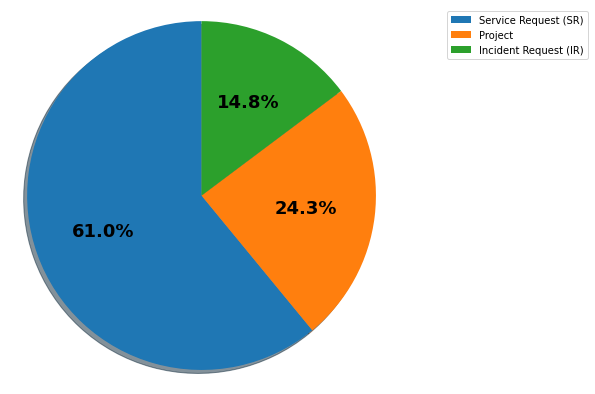

In [46]:
type_of_requests_created = ticktes_updated['Type of Request'].value_counts()
explode = (0, 0.1, 0, 0)
fig1, ax1 = plt.subplots(figsize=(7, 7))
request_index, request_value, autotext = ax1.pie(type_of_requests_created, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
ax1.legend(type_of_requests_created.index, loc='upper right', bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotext, size=18, weight="bold")
plt.xticks(fontsize=21)
plt.show()

In [19]:
type_of_requests_created.values

array([256, 102,  62], dtype=int64)

<AxesSubplot:>

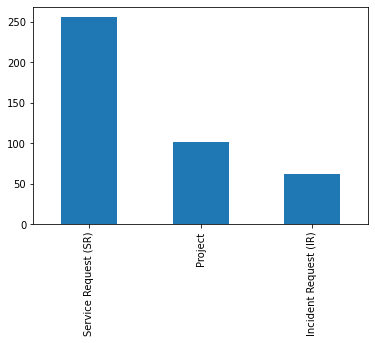

In [11]:
ticktes_updated['Type of Request'].value_counts().plot(kind='bar')

Average time to solve each type of the ticket

SRs open vs closed

IRs open vs closed

IRs per customer

Srs per customer

MTTR - tickets solved before the due date